# MAT 381E Homework 2

## Question 1

For this question we are going to use [an NBA dataset](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/). 

1. Get the data from the season 2018-2019 as a pandas dataframe. Explain each column in the dataset.
2. Write a function that takes the `GAME_ID` as the parameter and returns the full dataset for a given match. Test your function on 5 random matches.
3. Write a function that takes the `GAME_ID` as the parameter and returns a dictionary of (key,value) pairs where key is a player name and value is how many times that specific player appears in `PLAYER1_NAME`,`PLAYER2_NAME`, or `PLAYER3_NAME` columns.
4. Plot the results of Step 3 as a bar chart sorted from the most active player to the least active player for 5 random games.
3. Write a function that takes the `GAME_ID` as the parameter and returns a list of pairs of player names where the pair interacted during the game more than once. Test your function on 5 random matches.

Explanation of columns:

EVENTNUM:The number of events

GAME_ID:ID for each game

PCTIMESTRING:Time string belongs to Pasific Time

Period:The period of the game from which the relevant data is received

PLAYER_ID:Player ID for each player

PLAYER_TEAM_ABBREVATION:Player's teams

PLAYER_TEAM_CITY:Cities where the players belong to the team they play in

PLAYER_TEAM_ID:Cities IDs where the players belong to the team they play in

PLAYER_TEAM_NICKNAME:The nicknames of the teams the players played

Score:Scores of the given games

Score Margin:Averages of the given games

WCTIMESTRING:Time string belongs to Washington Time


        Unnamed: 0  EVENTMSGACTIONTYPE  EVENTMSGTYPE  EVENTNUM   GAME_ID  \
442766           0                   0            12         2  21800013   
442767           1                   0            10         4  21800013   
442768           2                   1             2         7  21800013   
442769           3                   0             4         8  21800013   
442770           4                  79             2         9  21800013   
...            ...                 ...           ...       ...       ...   
443195         429                 108             1       641  21800013   
443196         430                  79             2       643  21800013   
443197         431                   0             4       644  21800013   
443198         432                   0             8       646  21800013   
443199         433                   0            13       648  21800013   

                                          HOMEDESCRIPTION  NEUTRALDESCRIPTION  \
442766

C:\Users\bora5\AppData\Local\Temp\ipykernel_2096\348548938.py:26: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  key=pd.DataFrame(nba.groupby(['PLAYER1_NAME']))


{'Aaron Gordon': 0,
 'Aaron Holiday': 0,
 'Aaron McKie': 0,
 'Abdel Nader': 0,
 'Acie Earl': 0,
 'Adam Keefe': 0,
 'Adrian Caldwell': 0,
 'Al Horford': 0,
 'Al-Farouq Aminu': 0,
 'Alan Henderson': 0,
 'Alan Williams': 0,
 'Alec Burks': 0,
 'Alex Abrines': 0,
 'Alex Caruso': 0,
 'Alex Len': 0,
 'Alex Poythress': 0,
 'Alfonzo McKinnie': 0,
 'Alize Johnson': 0,
 'Allan Houston': 0,
 'Allen Crabbe': 0,
 'Allonzo Trier': 0,
 'Alonzo Mourning': 0,
 'Alton Lister': 0,
 'Amile Jefferson': 0,
 'Amir Johnson': 0,
 'Andre Drummond': 0,
 'Andre Iguodala': 0,
 'Andre Ingram': 0,
 'Andrew Bogut': 0,
 'Andrew DeClercq': 0,
 'Andrew Harrison': 0,
 'Andrew Wiggins': 0,
 'Andy Toolson': 0,
 'Anfernee Hardaway': 0,
 'Anfernee Simons': 0,
 'Angel Delgado': 0,
 'Ante Zizic': 0,
 'Anthony Bonner': 0,
 'Anthony Davis': 0,
 'Anthony Mason': 0,
 'Anthony Miller': 0,
 'Anthony Peeler': 0,
 'Anthony Tolliver': 0,
 'Anthony Tucker': 0,
 'Antoine Carr': 0,
 'Antonio Blakeney': 0,
 'Antonio Davis': 0,
 'Antonio Har

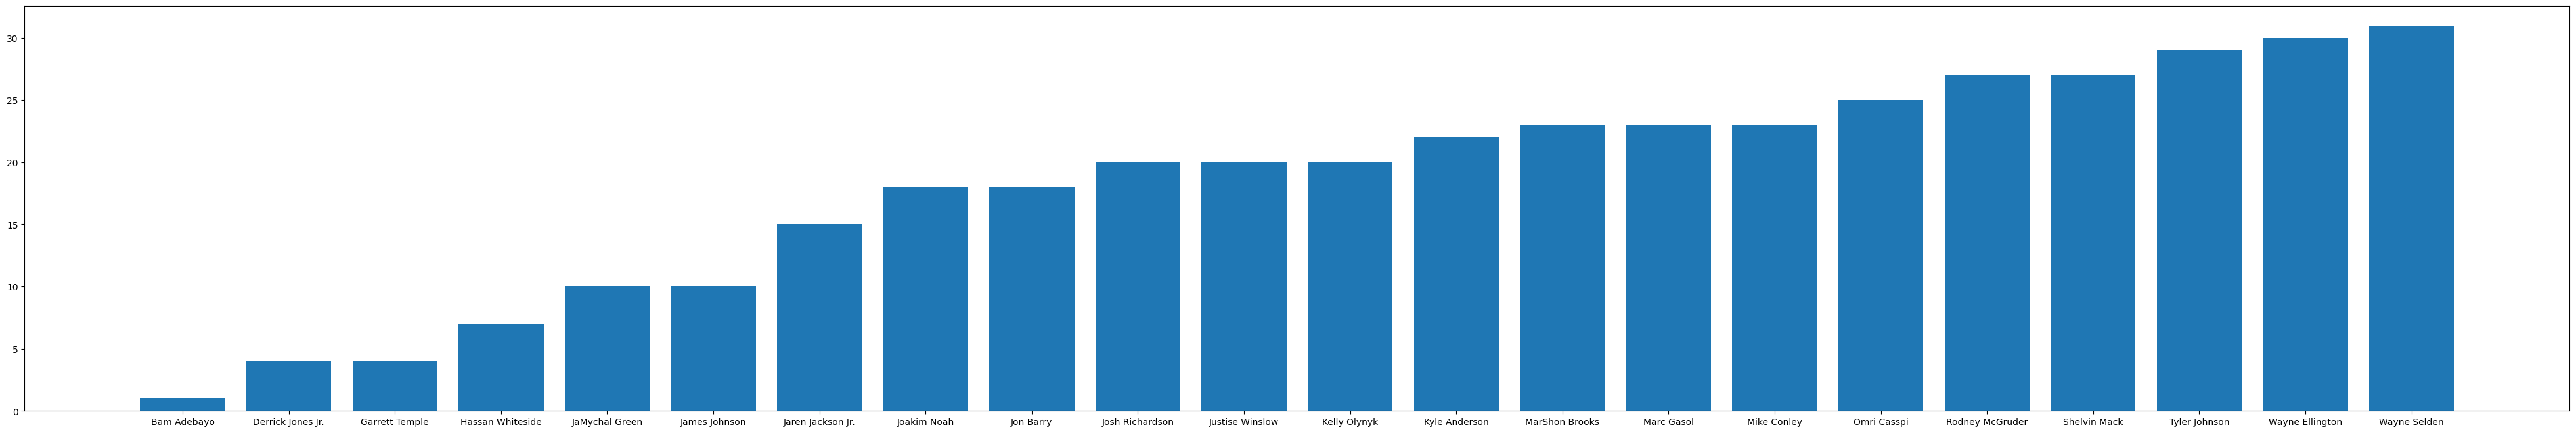

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

from urllib.request import Request, urlopen
from urllib.parse import urlencode
from collections import Counter
from zipfile import ZipFile
from io import BytesIO
import random
from xmltodict import parse
nba=pd.read_csv("https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv")
def gameid(GAME_ID):
    print(nba[nba['GAME_ID']==GAME_ID])

game_id=range(21800001,21801231)
print(gameid(random.choice(game_id)))
print(gameid(random.choice(game_id)))
print(gameid(random.choice(game_id)))
print(gameid(random.choice(game_id)))
print(gameid(random.choice(game_id)))

def playercount(GAME_ID):
   key=pd.DataFrame(nba.groupby(['PLAYER1_NAME']))
   nba1=nba[nba['GAME_ID']==GAME_ID]
   key=key[0]
   keylist=key.tolist()
   i=0
   valuem=list()
   while i<836:
      valuemm=valuem.append(len(nba1[nba1['PLAYER1_NAME']==key[i]]))
      i=i+1

   res  = {}
   for key in keylist:
        for value in valuem:
           res[key] = value
           valuem.remove(value)
           break
   dic_out={}
   for x, y in res.items():
    if y != 0:
        dic_out[x] = y

   keys=dic_out.keys()
   values=dic_out.values()
   

   plt.figure(figsize=(50,8))
   plt.bar(keys,sorted(values))

   return res

playercount(random.choice(game_id))



  



















## Question 2

For this question we are going to use [a sample](https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json) from [Spottify Million Playlist Dataset](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge).

1. Ingest the data as a python dictionary using the [json](https://docs.python.org/3/library/json.html) library.
2. Construct a complete list of all artists appearing in the dictionary you obtained in step 1. Then using [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) function count how many times each artist appears.
3. Filter out those artists that appear fewer than 100 times, and then sort the remaining from the most popular to least popular.
4. Plot the result you obtain from Step 3 as a bar chart.
5. Repeat Steps 2-4 for the Songs instead of Artists by filtering out the songs that appear 25 times or fewer.

## Question 3

For this question we are going to use [Wordbank Data](https://data.worldbank.org/). I would suggest [wbgapi](https://pypi.org/project/wbgapi/) library.

1. Write a function that takes a country name and a list of indicators and returns a pandas data frame with the corresponding data.
2. Get the data for Turkey for the following indicators:
   * [Poverty headcount ratio at national poverty lines (SI.POV.NAHC)](https://data.worldbank.org/indicator/SI.POV.NAHC)
   * [Current health expenditure per capita (SH.XPD.CHEX.PC.CD)](https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD)
   * [Labor force participation rate, female (% of female population ages 15+) (SL.TLF.CACT.FE.NE.ZS)](https://data.worldbank.org/indicator/SL.TLF.CACT.FE.NE.ZS)
   * [Mortality rate, under-5 (per 1,000 live births) (SH.DYN.MORT)](https://data.worldbank.org/indicator/SH.DYN.MORT)
   * [Literacy rate, adult female (% of females ages 15 and above) (SE.ADT.LITR.FE.ZS)](https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS)
3. Write a function that draws a line plot for a given list of indicators against time (i.e. the x-axis will be the time) AFTER it drops the years where data is not available. Draw a line plot for Turkey for all of the indicators I listed above.
4. Write a function that takes two indicators `id1` and `id2` and does a scatter plot of `id1` against `id2` after it drops the years where data is not available for one of the indicators. Your plot must have labels on the x- and the y-axes to indicate which indicators were used. Then draw a scatter plot (10 in total) for every pair of indicators I listed above.